In [1]:
import pandas  as pd

In [15]:
import numpy as np

In [6]:
from numpy import nan as NA

In [74]:
train_df = pd.read_csv("data/train.csv", header = 0)

In [75]:
import matplotlib

In [76]:
import matplotlib.pyplot as plt

In [77]:
test_df = pd.read_csv("data/test.csv", header= 0)

In [78]:
from sklearn.svm import LinearSVC

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_df.replace("male", 0).replace("female", 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [81]:
train_df["Age"].fillna("NaN")

0       22
1       38
2       26
3       35
4       35
5      NaN
6       54
7        2
8       27
9       14
10       4
11      58
12      20
13      39
14      14
15      55
16       2
17     NaN
18      31
19     NaN
20      35
21      34
22      15
23      28
24       8
25      38
26     NaN
27      19
28     NaN
29     NaN
      ... 
861     21
862     48
863    NaN
864     24
865     42
866     27
867     31
868    NaN
869      4
870     26
871     47
872     33
873     47
874     28
875     15
876     20
877     19
878    NaN
879     56
880     25
881     33
882     22
883     28
884     25
885     39
886     27
887     19
888    NaN
889     26
890     32
Name: Age, Length: 891, dtype: object

In [82]:
split_data = []

In [83]:
for survived in [0,1]:
    split_data.append(train_df[train_df.Survived == survived])

In [84]:
temp = [i["Pclass"].dropna() for i in split_data]

In [85]:
plt.hist(temp, histtype="barstacked", bins=3)

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

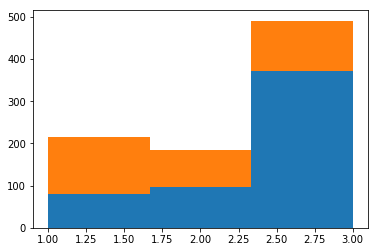

In [86]:
plt.show()

In [87]:
temp = [i["Age"].dropna() for i in split_data]

In [88]:
plt.hist(temp, histtype="barstacked", bins=16)

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 13.,  13.,   8.,  63.,  80.,  66.,  47.,  39.,  30.,  23.,  14.,
          11.,  10.,   3.,   4.,   0.]),
  array([  44.,   20.,   19.,   96.,  122.,  108.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

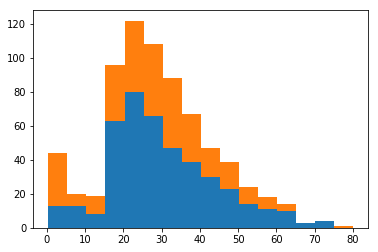

In [89]:
plt.show()

In [97]:
train_df["Familysize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [105]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [124]:
re_train_df = train_df.drop(["Name", "Cabin", "Embarked"], axis =1)

In [125]:
re_train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Familysize       int64
dtype: object

In [126]:
re_train_df = re_train_df.replace("male", 0).replace("female", 1)

In [127]:
re_train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Familysize       int64
dtype: object

In [128]:
train_data = re_train_df.values

In [129]:
xs = train_data[:, 2:]

In [130]:
y  = train_data[:, 1]

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
forest = RandomForestClassifier(n_estimators = 100)

In [133]:
forest = forest.fit(xs, y)

ValueError: could not convert string to float: 'W./C. 6607'